# 17. Метод Штрассена

*Метод Штрассена* умножения матриц заключается в разбиении матрицы на 4 равные клетки
$$\left(\begin{array}{cc}C_{11} & C_{12}   \\C_{21} & C_{22}   \\\end{array}\right)=\left(\begin{array}{cc}A_{11} & A_{12}   \\
A_{21} & A_{22}   \\\end{array}\right)\cdot\left(\begin{array}{cc}B_{11} & B_{12}   \\B_{21} & B_{22}   \\\end{array}\right)
$$
 и нахождения
произведения по формулам:
$$
\begin{array}{l}
D_1 = (A_{11} + A_{22}) \cdot (B_{11} + B_{22}) \\
D_2 = (A_{12} - A_{22}) \cdot (B_{21} + B_{22}) \\
D_3 = (A_{11} - A_{21}) \cdot (B_{11} + B_{12}) \\
D_4 = (A_{11} + A_{12}) \cdot B_{22} \\
D_5 = (A_{21} + A_{22}) \cdot B_{11} \\
D_6 = A_{11} \cdot (B_{12} - B_{22}) \\
D_7 = A_{22} \cdot (-B_{11}+B_{21}) \\\end{array}
$$

$$
  \begin{array}{l}
    C_{11}  = D_1+D_2-D_4+D_7 ,\\
    C_{12}  =D_4+D_6,\\
    C_{21}  =D_5+D_7,\\
    C_{22}  =D_1-D_3-D_5+D_6.\\
  \end{array}
$$

Для нахождения произведений вида $(A_{11} + A_{22}) \cdot (B_{11} + B_{22})$ и т.п.
рекурсивно используется тот же алгоритм.

# Необходимые библиотеки

In [248]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import math

# Алгоритм Штрассена 
Алгоритм Штрессана умножения квадратных матриц порядка $n$ использует $O(n^{\log_2 7}) = O(n^{2.8})$ операций.

In [249]:
def strassen(A,B):
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.float32).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        k = n//2
        
        A11,A21,A12,A22 = A[:k,:k], A[k:, :k], A[:k, k:], A[k:, k:]
        B11,B21,B12,B22 = B[:k,:k], B[k:, :k], B[:k, k:], B[k:, k:]

        S1 = B12 - B22
        S2 = A11 + A12
        S3 = A21 + A22
        S4 = B21 - B11
        S5 = A11 + A22
        S6 = B11 + B22
        S7 = A12 - A22
        S8 = B21 + B22
        S9 = A11 - A21
        S10= B11 + B12

        D1 = strassen(A11, S1)
        D2 = strassen(S2, B22)
        D3 = strassen(S3, B11)
        D4 = strassen(A22, S4)
        D5 = strassen(S5, S6)
        D6 = strassen(S7, S8)
        D7 = strassen(S9, S10)

        C[:k,:k] = D5 + D4 - D2 + D6
        C[:k, k:] = D1 + D2
        C[k:, :k] = D3 + D4
        C[k:, k:] = D5 + D1 - D3 - D7

    return C

# Обычный алгоритм умножения матриц 

Обычный алгоритм умножения квадратных матриц порядка $n$ использует $O(n^3)$ операций

In [250]:
def defaultProduct(A, B):
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.float32).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
    return C

# Данные
Для работы алгоритмов нужно две матрицы порядка $n = 2^k$, где $k$ пренадлежит множеству натуральных чисел $N$.
Данная функция принимает на вход размерность массива и генерирует две квадратные матрицы размерностью $n*n$, заполняя и случайными значениями с плавающей точкой от $0$ до $1$ для повышения скорости работы алгоритмов


In [251]:
def Gen(n):
    A = np.random.uniform(0,1, size=(n,n))
    B = np.random.uniform(0,1, size=(n,n))
    return A, B

# Отрисовка графиков
Данная функция принимает на вход мерность матрицы, скорость работы алгоритма *Штрассена* и скорость работы *обычного* алгоритма умножения

In [318]:
def Graf(n,timeStrassen,timeDefault,k):
    if k == 1:
        fs = np.polyfit(n,timeStrassen,4)
        fd = np.polyfit(n,timeDefault,4)
        xx = np.linspace(1,2**(n.shape[0]-1),500)  
        uu = np.linspace(1,2**(n.shape[0]-1),500)

        yyS = np.polyval(fs, xx)
        yyD = np.polyval(fd, uu)
    
        plt.plot(xx, yyS, color = 'tab:cyan',label='Strassen algoritm')
        plt.plot(uu, yyD, color = 'tab:purple',label='Default algoritm')
        plt.plot(n, timeStrassen ,'o', color = 'tab:blue')
        plt.plot(n, timeDefault,'o', color = 'tab:green')
        plt.grid()
        plt.legend()
        pass
    else:  
        plt.plot(n, timeStrassen ,'o', color = 'tab:blue',label='Strassen algoritm')
        plt.plot(n, timeStrassen, '-', color = 'tab:blue')

        plt.plot(n, timeDefault,'o', color = 'tab:green',label='Default algoritm')
        plt.plot(n, timeDefault, '-', color = 'tab:green')

        plt.grid()
        plt.legend()


# Главная программа
Здесь вызываются выше перечисленные функции. Алгоритмы вызываются в цикле, время выполнения каждого алгоритма умножения записывается в массив и после передется в **Graf** с цель отобразить полученные данные

In [312]:
g = 11
timeStrassen= np.zeros((g),dtype=np.float)
timeDefault= np.zeros((g),dtype=np.float)


n = np.arange(g)
l = math.log(7)/math.log(2)

OtimeStrassen= np.zeros((g),dtype=np.float)
OtimeDefault= np.zeros((g),dtype=np.float)

for i in range(g):

    k = 2**i
    A,B = Gen(k)
    n[i]=k;
    
    start_time=time.time()
    C = strassen(A, B)
    delta_time=time.time() - start_time
    timeStrassen[i] = delta_time
    
    OtimeStrassen[i] = delta_time/(k**l)
    
    start_time=time.time()
    C = defaultProduct(A,B)
    delta_time=time.time() - start_time
    timeDefault[i] = delta_time
    
    OtimeDefault[i] = delta_time/(k**3)
    print(k)
    print("S",timeStrassen[i])
    print("D", timeDefault[i] )


print("Done")




1
S 0.0
D 0.0
2
S 0.0009965896606445312
D 0.0
4
S 0.0
D 0.0
8
S 0.004987239837646484
D 0.001994609832763672
16
S 0.015996694564819336
D 0.015957355499267578
32
S 0.10874319076538086
D 0.12225794792175293
64
S 0.8015480041503906
D 0.9693603515625
128
S 5.669224977493286
D 7.737067461013794
256
S 38.223562240600586
D 61.25416707992554
512
S 274.22534012794495
D 508.11626076698303
1024
S 1795.9896838665009
D 4425.339256763458
Done


# Скорость работы в зависимости от мерности матрицы

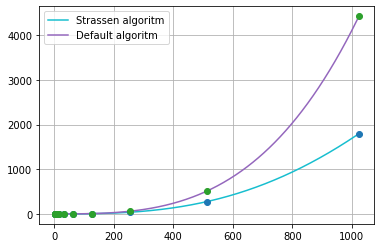

In [315]:
Graf(n,timeStrassen,timeDefault,1)

Здесь мы можем наблюдать, что алгоритм Штрассена быстрее обычного

# Ассимптотика

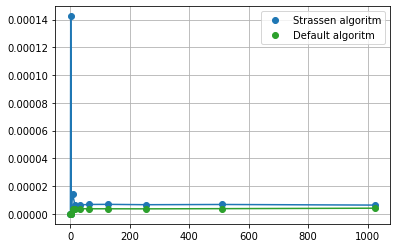

In [319]:
Graf(n,OtimeStrassen,OtimeDefault,0)

На графике видно, что отношение времени выполнения программы к сложности алгоритма при n-> inf имеет предел выраженный в асимптоте

# Вывод
В данной лабораторной работе я доказал эксперементальным путем, что для матриц размерности $2^k$ алгоритм Штрассена работает быстрее обычного алгоритма умножения матриц.